In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [3]:
df2 = pd.read_csv('dataset.csv')
df = df2.copy()

In [4]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N
277,LP001904,Male,Yes,0,Graduate,No,3103,1300.0,80.0,360.0,1.0,Urban,Y
455,LP002455,Male,Yes,2,Graduate,No,3859,0.0,96.0,360.0,1.0,Semiurban,Y
270,LP001888,Female,No,0,Graduate,No,3237,0.0,30.0,360.0,1.0,Urban,Y
118,LP001421,Male,Yes,0,Graduate,No,5568,2142.0,175.0,360.0,1.0,Rural,N
441,LP002409,Male,Yes,0,Graduate,No,7901,1833.0,180.0,360.0,1.0,Rural,Y
410,LP002318,Female,No,1,Not Graduate,Yes,3867,0.0,62.0,360.0,1.0,Semiurban,N
43,LP001131,Male,Yes,0,Graduate,No,3941,2336.0,134.0,360.0,1.0,Semiurban,Y
313,LP002008,Male,Yes,2,Graduate,Yes,5746,0.0,144.0,84.0,NaN,Rural,Y
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### *Handling Missing Values*

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.dropna(inplace=True)

### *Label Encoding in target column*

In [8]:
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [9]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


### *Working On Dependents Columns*

In [10]:
df['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [11]:
# replacing the 3+ with the 4
df = df.replace(to_replace='3+',value=4)

In [12]:
df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

## **Data Visualization**

### *Relation between Education status and loan status*

<Axes: xlabel='Education', ylabel='count'>

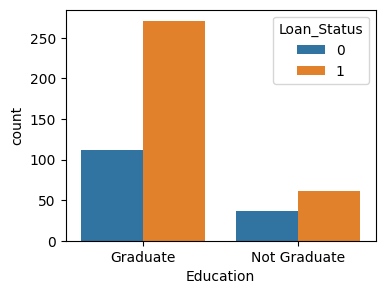

In [13]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Education',hue='Loan_Status',data=df)

### *Relation between Marital status and loan status*

<Axes: xlabel='Married', ylabel='count'>

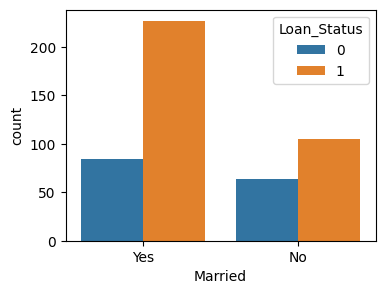

In [14]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Married',hue='Loan_Status',data=df)

In [15]:
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,0


### *Relation between Self_employed and loan status*

<Axes: xlabel='Self_Employed', ylabel='count'>

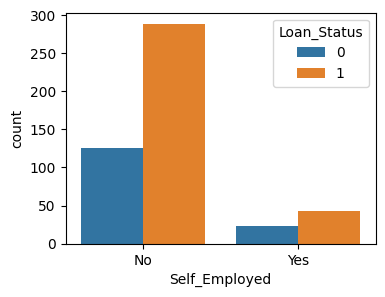

In [16]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

### *Relation between Property Area and loan status*

<Axes: xlabel='Property_Area', ylabel='count'>

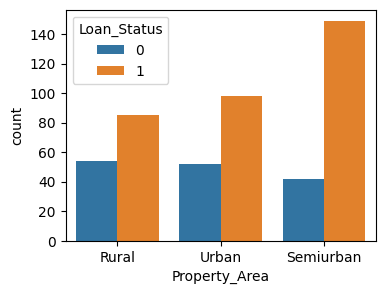

In [17]:
plt.figure(figsize=(4,3))
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

### *Distribution of Loan Amount Term*

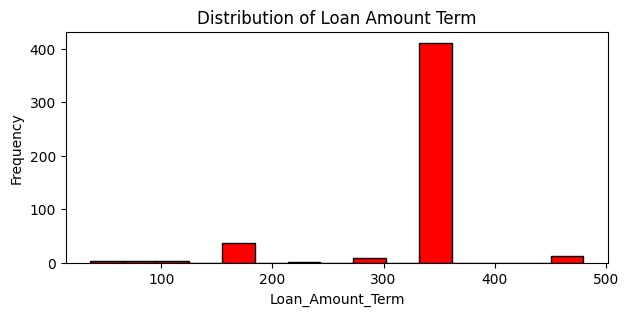

In [18]:
plt.figure(figsize=(7,3))
plt.hist(df['Loan_Amount_Term'], bins=15, color='red', edgecolor='black')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount Term')
plt.show()

### *Distribution of Loan Amount*

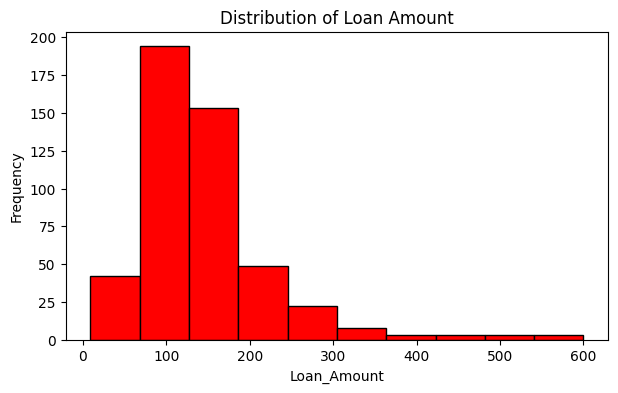

In [19]:
plt.figure(figsize=(7,4))
plt.hist(df['LoanAmount'],bins=10, color='red', edgecolor='black')
plt.xlabel('Loan_Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')
plt.show()

### *Relation Between Gender and Loan_status*

<Axes: xlabel='Gender', ylabel='count'>

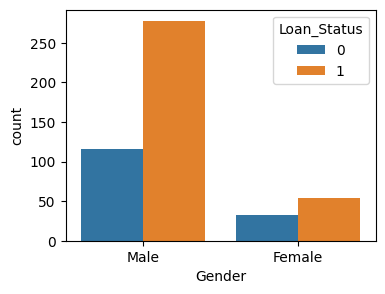

In [20]:
plt.figure(figsize=(4,3))
sns.countplot(x='Gender',hue='Loan_Status',data=df)

### *Relation between Dependent and Loan Status*

<Axes: xlabel='Dependents', ylabel='count'>

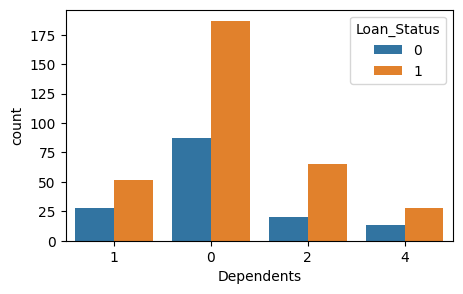

In [21]:
plt.figure(figsize=(5,3))
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

### *Relation Between the Credit History and Loan_Status*

<Axes: xlabel='Credit_History', ylabel='count'>

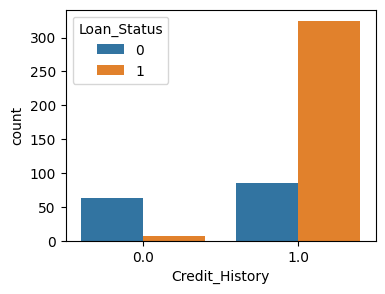

In [22]:
plt.figure(figsize=(4,3))
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

### *Distribution of Applicant Income*

Text(0.5, 1.0, 'Distribution of ApplicantIncome')

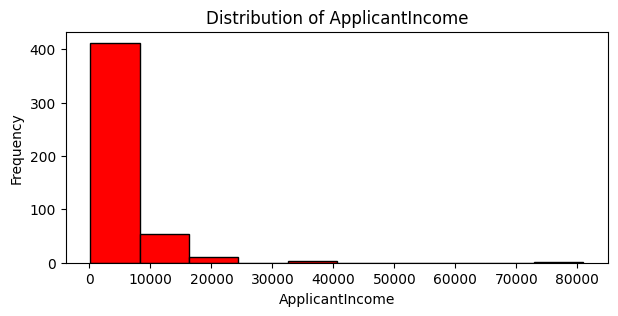

In [23]:
plt.figure(figsize=(7,3))
plt.hist(df['ApplicantIncome'],bins=10, color='red', edgecolor='black')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.title('Distribution of ApplicantIncome')

### *Converting Categorical features into Numerical features*

In [24]:
df.replace({'Married':{'No':0,'Yes':1},
            'Gender':{'Male':1,'Female':0},
            'Self_Employed':{'No':0,'Yes':1},
            'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
            'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [25]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [26]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### **Splitting the data**

In [27]:
x = df.drop(columns=['Loan_ID','Loan_Status']).values
y = df['Loan_Status'].values

In [28]:
x.shape

(480, 11)

## **Model Building**

In [29]:
# The stratify parameter in train_test_split is used to ensure that the splitting of data into train and test sets maintains the proportion of classes or labels in the target variable y.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [30]:
print(x.shape,x_train.shape,x_test.shape)

(480, 11) (384, 11) (96, 11)


### **SVM - Model**

In [31]:
classifier = svm.SVC(kernel='linear')

In [32]:
# classifier.fit(x_train,y_train)

#### *test accuracy*

In [33]:
# svm_predict = classifier.predict(x_test)
# accuracy_score(svm_predict,y_test)

#### *train accuracy*

In [34]:
# svm_train_predict = classifier.predict(x_train)
# accuracy_score(svm_train_predict,y_train)

### **RandomForest-Model**

In [35]:
rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)

In [36]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, random_state=42)

#### *test accuracy*

In [37]:
rf_predict = rf.predict(x_test)
accuracy_score(rf_predict,y_test)

0.84375

#### *train accuracy*

In [38]:
rf_train_predict = rf.predict(x_train)
accuracy_score(rf_train_predict,y_train)

0.8567708333333334

In [39]:
rf_train_predict

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

+ accuracy score of svm = 83
+ accuracy score of randomforest = 85

In [40]:
# import pickle
# filename = 'loan.pkl'
# pickle.dump(rf,open(filename,'wb'))


In [41]:
x_test[0]

array([1, 1, '0', 0, 0, 3406, 4417.0, 123.0, 360.0, 1.0, 1], dtype=object)

In [42]:
y_test

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [43]:
rf.predict([x_test[23]])

array([1], dtype=int64)

In [44]:
df['Loan_Status'].value_counts()

Loan_Status
1    332
0    148
Name: count, dtype: int64